# PRUDENTIAL LIFE INSURANCE MODEL - PKENNEDY




1. Kaggle
    1. clean
    2. anonymous
    3. normalized (where appropriate)
2. Model frenzy
3. XGBoost and getting in the top 10%

## PROBLEM:
### The current method for establishing risk in applicants takes 30 days on average. In a world with on-demand access to almost everything, this is an opportunity to gain an advantage relative to other life insurance providers.

### The data to make these predictions are delivered by customers.  If there were a way to make the risk classification more automatic, this could reduce the time cost.

### This leads to the question: can one build a predictive model that accurately and reliably classifies risk for life insurance policies?

<h1></h1>

## DATA:
### The data comes from Prudential Life Insurance from their Kaggle competition. There are 126 features excluding a unique ID number for each anonymized applicant.  The target is named Response, an ordinal variable relating to the final decision associated with an application.
### The data are in the form of categorical (61), dummy (48), continuous (13) and discrete (4) variables.  These variables range from physical characteristics to employment history and particular associated medical keywords.  All variables are normalized when possible or coded to preserve anonymity.
#### <em>Id</em>	 :  A unique identifier associated with an application.  
#### <em>Product_Info_1-7</em>  :  A set of normalized variables relating to the product applied for  
#### <em>Ins_Age</em>:	Normalized age of applicant  
#### <em>Ht</em>:	Normalized height of applicant  
#### <em>Wt</em>:	Normalized weight of applicant  
#### <em>BMI</em>:	Normalized BMI of applicant  
#### <em>Employment_Info_1-6</em>:	A set of normalized variables relating to the employment history of the applicant.  
#### <em>InsuredInfo_1-6</em>:	A set of normalized variables providing information about the applicant.  
#### <em>Insurance_History_1-9</em>:	A set of normalized variables relating to the insurance history of the applicant.  
#### <em>Family_Hist_1-5</em>:	A set of normalized variables relating to the family history of the applicant.  
#### <em>Medical_History_1-41</em>:	A set of normalized variables relating to the medical history of the applicant.  
#### <em>Medical_Keyword_1-48</em>:	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.  
#### <em>Response</em>:	This is the target variable, an ordinal variable relating to the final decision associated with an application  


### Let's look at the data real quick...

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = '/Users/patrickkennedy/Desktop'

train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

train.head()

#Note that Product_Info_2 is the only feature containing non-integers, even though the categorical list is much longer

/Users/patrickkennedy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [3]:
categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6',
               'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
               'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
               'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4',
               'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2',
               'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7',
               'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12',
               'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18',
               'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23',
               'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29',
               'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35',
               'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40',
               'Medical_History_41']


continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']

discrete = ['Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

train[continuous].describe()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000
mean,0.328952,0.405567,0.707283,0.292587,0.469462,0.077582,0.006283,0.361469,0.001733,0.474550,0.497737,0.444890,0.484635
std,0.282562,0.197190,0.074239,0.089037,0.122213,0.082347,0.032816,0.349551,0.007338,0.154959,0.140187,0.163012,0.129200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.238806,0.654545,0.225941,0.385517,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786
50%,0.230769,0.402985,0.709091,0.288703,0.451349,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929
75%,0.487179,0.567164,0.763636,0.345188,0.532858,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000


In [4]:
print train.shape
print test.shape

(59381, 128)
(19765, 127)


### The shape of the training data is 59381 rows while the test data is 19765 rows.  The reponse variable is removed from the test data yielding 127 columns instead of the training set's 128.

### The data will unfortunately not afford many opportunities for intuition as much of the meaning of the data is obscured for sake of anonymity.  Let's take a quick peak at the target variable to see how that is distributed...

/Users/patrickkennedy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
dtype: int64

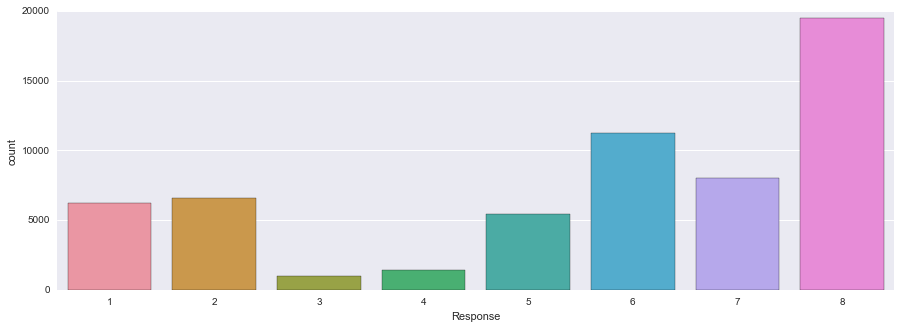

In [5]:
# response

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x=train["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)
train.Response.value_counts()

### Response values of 3 and 4 are by far the least common with less than 1500 each while response 8 yields roughly 33% of the responses.  It will be interesting to investigate if there are particular relationships between these variables and any of the features.

### Let's look at the _NaN_ values to see if there is any effect on the response variable.  If so, we may want to transform these values in a particular way.

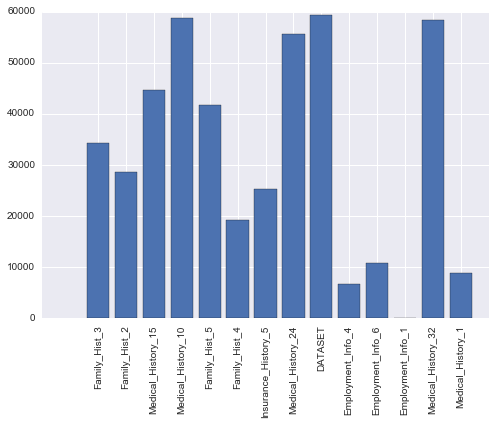

In [6]:
isnull_dict = {}
for col in train.columns:
    var = train[col].isnull().sum()
    if var > 0:
        isnull_dict[col] = var

isnull_dict['DATASET'] = train.shape[0]

plt.bar(range(len(isnull_dict)), isnull_dict.values(), align='center')
plt.xticks(range(len(isnull_dict)), isnull_dict.keys(), rotation=90)

plt.show()

### Medical History 10, 24, 32 are >90% _NaN_.  Employment Info 1, 4, 6 and Medical History 1 have managable amounts of _NaN_.  Other heavy _NaN_ features are Family Hist 2, 3, 4, 5, Medical History 15, and Insurance History 5.  All other features have 0% _NaN_ values.  Let's look at the relationship between these particular values and the target variable.

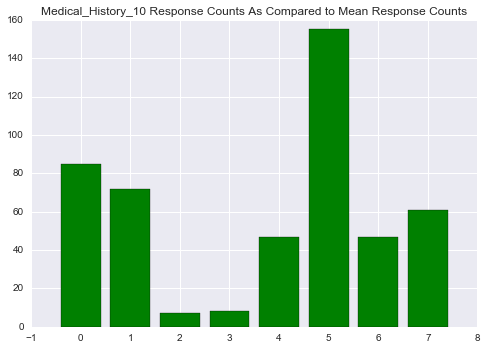

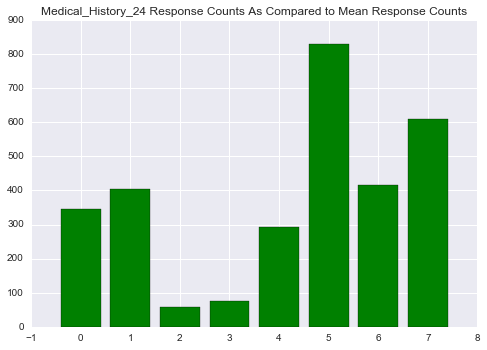

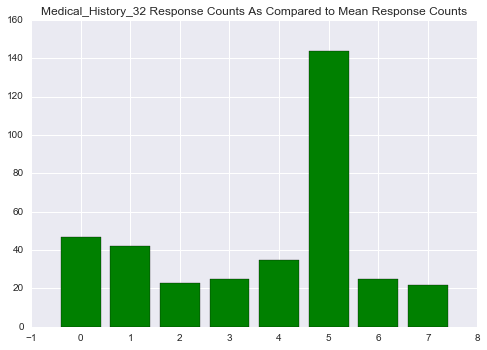

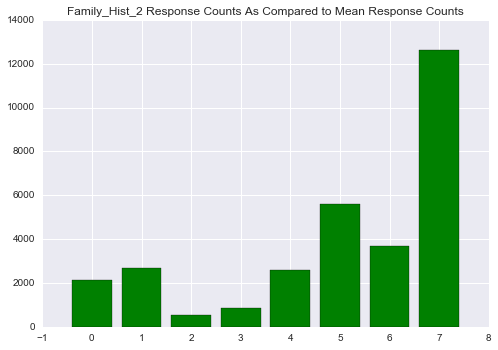

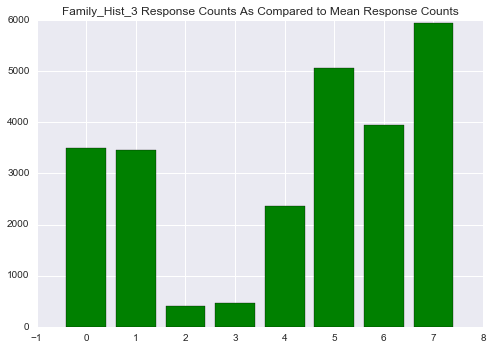

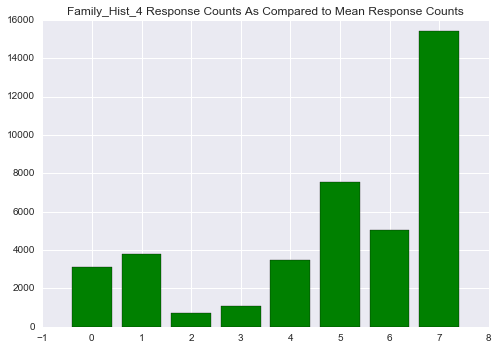

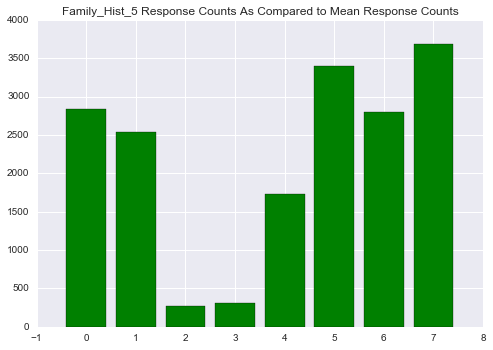

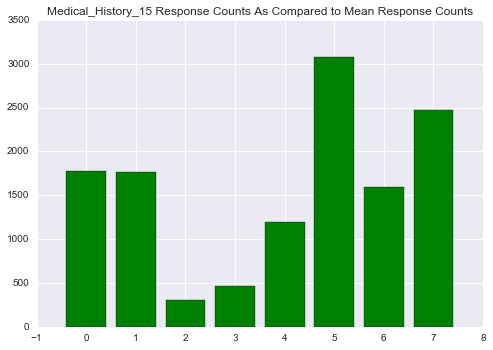

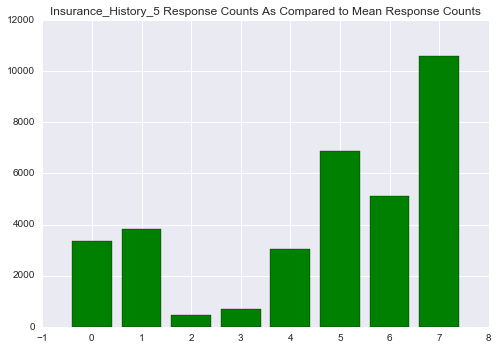

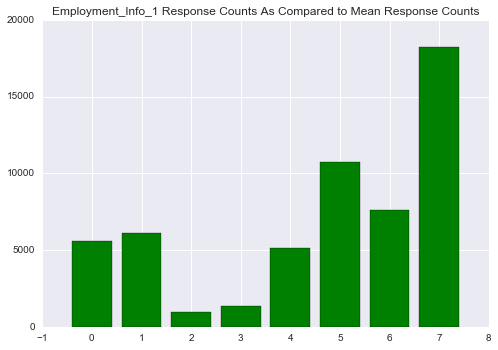

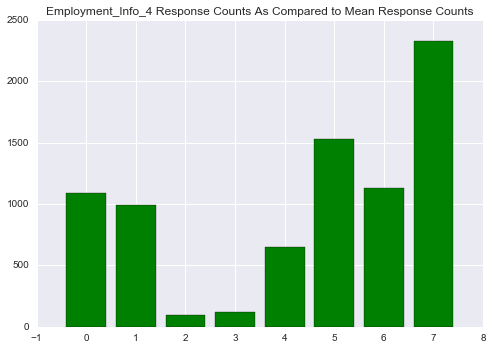

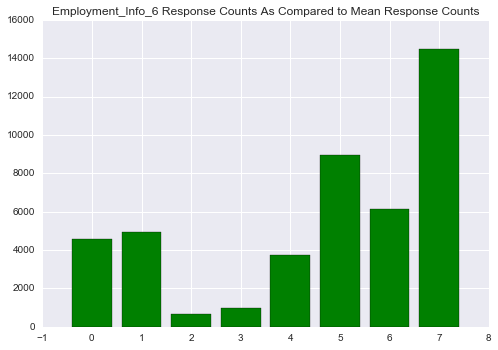

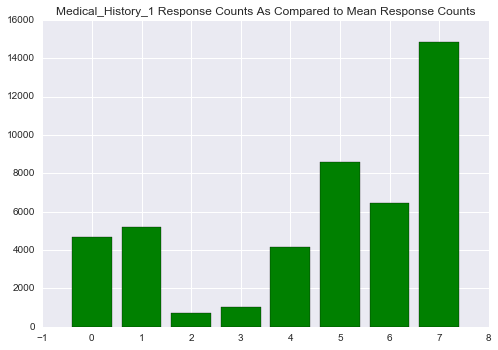

In [7]:
columns = ['Medical_History_10', 'Medical_History_24', 'Medical_History_32', 'Family_Hist_2', 
           'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_15', 'Insurance_History_5',
          'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1']


#for col in columns:
#    print col, type(train[col][0])
    
#good these are all floats so we can use >0 logic to get non null values
#put these on pdfs to get the scales right
response_vals = []
clean_response_vals = []
clean_list = []

for i, col in enumerate(columns):
    response_vals.append(train[train[col] > 0].Response.value_counts())
    clean_response_vals.append(response_vals[i].sort_index())
    clean_list.append(clean_response_vals[i].tolist())

for i in range(len(clean_list)):
    plt.bar(range(len(clean_list[i])), clean_list[i], align='center', color='g')
    plt.title(columns[i] + " Response Counts As Compared to Mean Response Counts")
    plt.show()


### The features that have different distributions are: Medical History 10, Medical History 24, Medical History 32. Given these features are also the highest _NaN_ columns, let's drop these from the model and see how the model may change.  

#### NOTE: it doesn't

## BEGIN MODELING:
### For the first model, let's impute the _NaN_'s and use XGBoost.  We try XGBoost because of its speed as this data set is large enough for me to be impatient while running slower models.  We also try XGBoost because of its ability to be customized.

#### from https://github.com/dmlc/xgboost

#### XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting(also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment(Hadoop, SGE, MPI) and can solve problems beyond billions of examples. XGBoost is part of DMLC projects.

<img src="x-plot-time.png">
<img src="x-plot-auc.png">

### without further ado...

In [8]:
#defining a function that would make it easy to switch out models
#doing the mapping and a binary classification for each response level
#using the training data as the train/test split
#cross validate to see how the model performs
#thank you to michael from kaggle here for the offsetting/QWK inspiration

import time
t0 = time.clock()

import pandas as pd 
import numpy as np 
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa


def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)

def get_params():
    
    params = {}
    params["objective"] = "reg:linear"     
    params["eta"] = 0.1
    params["min_child_weight"] = 50
    params["subsample"] = 0.5
    params["colsample_bytree"] = 0.30
    params["silent"] = 1
    params["max_depth"] = 9
    plst = list(params.items())
    return plst

def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, target=2 in the first dim
    #data[0]==sv acts as a way to group the classes together (8)
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    
    #use QWK to get the relative diff between pred+offset and actual
    score = scorer(data[1], data[2])
    return score


# global variables
columns_to_drop = ['Id', 'Response']
xgb_num_rounds = 500 #5000 gives me good score (~15 min), 10000 (~32 min) (no improvement)
num_classes = 8

print("Load the data using pandas")
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)

#continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
#              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']


#Given the high dimensionality to the dataset, let's run a principal component analysis to reduce it
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#X_scaled = StandardScaler().fit_transform(all_data[continuous])
#pca = PCA(n_components=len(continuous), whiten=True).fit(X_scaled)
#all_data_PCA = pca.transform(X_scaled)

#PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']

#all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    

#add back into all_data and drop the continuous variables
#all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
#all_data_new.drop(continuous, axis=1)


#factorize this feature because of its non-integer type
#turns the categorical into an array of unique values
all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]

# fix the dtype on the target column
all_data['Response'] = all_data['Response'].astype(int)

# split train and test
train = all_data[all_data['Response']>0].copy()
test = all_data[all_data['Response']<1].copy()

print test
    
# convert data to xgb data structure
xgtrain = xgb.DMatrix(train.drop(columns_to_drop, axis=1), train['Response'].values)
xgtest = xgb.DMatrix(test.drop(columns_to_drop, axis=1), label=test['Response'].values)    

# get the parameters for xgboost
plst = get_params()
print(plst)      

# train model
model = xgb.train(plst, xgtrain, xgb_num_rounds) 

# get preds -- prevent overfitting using an early stopping method
train_preds = model.predict(xgtrain, ntree_limit=model.best_iteration)


#use quadratic weighted kappa as the metric (an inter rater agreement statistic with a max of 1)
#weighted kappa counts disagreements differently (great for here because of the multiclass response var)
print('Train score is:', eval_wrapper(train_preds, train['Response'])) 

#get test preds
test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)


#here's where it gets fun...
#offsets are applied to test as a correction to the error in the model
#first, build offsets for each level
offsets = np.ones(num_classes)
offset_train_preds = np.vstack((train_preds, train_preds, train['Response'].values))


#second, the QWK is maximized and an optimizer is used on the result to minimize the negative of the QWK (which acts to maximize)
offsets_list = np.ones(num_classes) * -0.5
for j in range(num_classes):
    #for each class, run apply_offset function on the training preds
    #and use fmin_powell to return the minimized function values
    train_offset = lambda x: -apply_offset(offset_train_preds, x, j)
    
    for i in range(5): #run through the optimization 5 times as the best guess influences greatly for fmin_p func
        offsets_list[j] = fmin_powell(train_offset, offsets[j])  #default xtol, ftol values are best
        print offsets[j], offsets_list[j] #show the last and current guess
        offsets[j] = offsets_list[j] #reset the guess
    
    
# apply offsets to test preds generated from above
data = np.vstack((test_preds, test_preds, test['Response'].values))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets_list[j]    
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)

preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
preds_out = preds_out.set_index('Id')
preds_out.to_csv('xgb_offset_submission.csv')

print time.clock()-t0

#model performs at .66919 ... ranked 138 / 1908... top 10%!


#possible to split train into train_a, train_b build model on train_a, train offsets on train_a,
#run model on train_b, apply offsets


Load the data using pandas
Eliminate missing values
            BMI  Employment_Info_1  Employment_Info_2  Employment_Info_3  \
0      0.472262           0.150000                  3                  1   
1      0.484984           0.000000                  1                  3   
2      0.519103           0.143000                  9                  1   
3      0.486962           0.210000                  9                  1   
4      0.428718           0.085000                  9                  1   
5      0.379754           0.075000                  9                  1   
6      0.373628           0.140000                  9                  1   
7      0.388655           0.025000                  9                  1   
8      0.446361           0.035000                  9                  1   
9      0.443418           0.060000                  9                  1   
10     0.362274           0.300000                  1                  3   
11     0.314304           0.040000  

In [122]:
#Current model performs at ~.66919 -- ranked 272 / 2015 - 13.5% .... something happened over the weekend



#this shows all values in the array (rather than a truncated list)
#get to see the non-clipped data to get a gut feel for the data performance
def fullprint(*args, **kwargs):
  from pprint import pprint
  import numpy
  opt = numpy.get_printoptions()
  numpy.set_printoptions(threshold='nan')
  pprint(*args, **kwargs)
  numpy.set_printoptions(**opt)

for x in data[1]:
    fullprint("{0:.4f}".format(float(x)))

'2.8708'
'7.2750'
'7.0885'
'6.9299'
'7.3285'
'82.3895'
'7.0016'
'82.6274'
'5.0700'
'82.2967'
'8.0817'
'7.0590'
'3.6093'
'82.7563'
'5.4687'
'7.3103'
'7.0326'
'7.3202'
'82.5651'
'2.8213'
'7.7116'
'82.4978'
'8.2296'
'83.0883'
'7.0251'
'6.9435'
'82.9088'
'82.8908'
'2.3165'
'82.4190'
'5.4112'
'-1.2482'
'3.8233'
'8.0745'
'1.9623'
'-1.0899'
'8.1711'
'7.4146'
'5.0424'
'83.0146'
'-1.0155'
'3.5366'
'82.3292'
'82.7901'
'5.5891'
'-0.5577'
'83.1692'
'6.8581'
'82.7520'
'6.8919'
'82.4604'
'3.5389'
'8.1823'
'7.3128'
'5.9710'
'4.1099'
'5.1081'
'82.7367'
'83.0163'
'3.5386'
'3.5298'
'4.0086'
'4.2631'
'5.6195'
'5.1096'
'4.2224'
'5.9876'
'5.8158'
'7.4989'
'7.0986'
'82.9837'
'2.4088'
'7.6071'
'-0.5691'
'7.0669'
'8.4369'
'5.1478'
'2.0633'
'6.8200'
'3.7756'
'82.8076'
'2.5570'
'3.3892'
'2.8458'
'5.9689'
'-1.2144'
'82.5961'
'82.3220'
'3.9289'
'-1.3007'
'5.2095'
'4.1153'
'3.3621'
'82.7250'
'-1.1920'
'5.9683'
'3.5876'
'5.0758'
'3.7787'
'5.6717'
'82.8848'
'4.1065'
'82.7095'
'2.0022'
'7.5249'
'82.7369'
'7.4559'
'2.

## Next steps:
1. Trying a different model? - heard-tell of top scores being genetic algorithms (have no idea how they work)
2. Evaluating feature importance (I just learned XGBoost had this ability)
3. Evaluating model with cross validation (I *also* just learned XGBoost had this ability)
#
#


## Lessons:
1. kNN not fun to run with this much data
2. One v all logistic regression performed poorer than I had originally thought
3. If you refresh the kaggle submission page, it'll resubmit your previous file (you only get 5 per day)
4. A relatively simple model with XGBoost can get a top score with a little tweaking

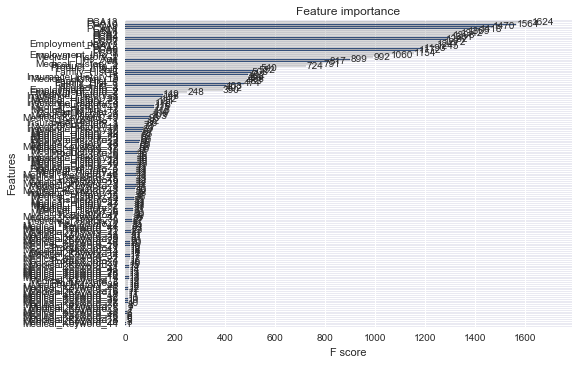

In [78]:
import seaborn as sns

#plt.figure(figsize=(40,20))
xgb.plot_importance(model)
#plt.show()

# Spare code underneath

## FITTING THE MODEL:
### We need to convert the response prediction to a 1-8 scale as it has a min of less than 1 and a max greater than 9 at the moment.

In [121]:
def output_function(x):
    if x<1:
        return 1
    elif x>8:
        return 8
    elif int(round(x))==3:
        return 2
    else:
        return int(round(x))
        
y_test_bst_result=[output_function(y) for y in y_test_bst]

#write results

ids=test.Id.values.tolist()
n_ids=len(ids)


import csv

prediction_file = open("pythonxgb.csv", "w")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["Id","Response"])
for i in range(0,n_ids):
    prediction_file_object.writerow([ids[i],y_test_bst_result[i]])



## PREPROCESSING:
### Let's begin transforming the data and getting it ready for some analysis.

In [124]:
#let's pull in our categorical features and convert them to dummies in list of dictionaries
#categorical.remove('Medical_History_10') #we'll remove Medical_History_24 and Medical_History_32 later
#print categorical

cat_train_df = train[categorical]
cat_train_dict = cat_train_df.T.to_dict().values()

cat_test_df = test[categorical]
cat_test_dict = cat_test_df.T.to_dict().values()

#let's remove the categorical variables from the initial dataframe and save it to another
# so that we can concatenate after vectorizing the dictionaries
x_train_no_cat = train.drop(categorical, axis=1)
x_test_no_cat = test.drop(categorical, axis=1)


#here we vectorize the dictionaries aka one-hot encoding into the dataframe
from sklearn.feature_extraction import DictVectorizer as DV
vectorizer = DV(sparse=False)
vec_x_cat_train = pd.DataFrame(vectorizer.fit_transform(cat_train_dict))
vec_x_cat_test = pd.DataFrame(vectorizer.transform(cat_test_dict)) 

x_train = pd.concat([x_train_no_cat, vec_x_cat_train], axis=1)
x_test = pd.concat([x_test_no_cat, vec_x_cat_test], axis=1)

In [36]:
#doing the mapping and a binary classification for each response level
#using the training data as the train/test split
#cross validate to see how the model performs


import time
t0 = time.clock()

import pandas as pd 
import numpy as np 
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, target=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

# global variables

columns_to_drop = ['Id', 'Response']
params = {"objective":"reg:linear", 
          "eta":0.1, 
          "min_child_weight":50,
          "subsample":0.5, 
          "colsample_bytree":0.30,
          "silent":1,
          "max_depth":9}
xgb_num_rounds = 150 #5000 gives me good score (~15 min), 10000 (~32 min) (no improvement)
num_classes = 8

print("Load the data using pandas")
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)

continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']


#Given the high dimensionality to the dataset, let's run a principal component analysis to reduce it
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(all_data[continuous])
pca = PCA(n_components=len(continuous), whiten=True).fit(X_scaled)
all_data_PCA = pca.transform(X_scaled)

PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']

all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    

#add back into all_data and drop the continuous variables
all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
all_data_new.drop(continuous, axis=1)


#factorize this feature because of its non-integer type
#turns the categorical into an array of unique values
all_data_new['Product_Info_2'] = pd.factorize(all_data_new['Product_Info_2'])[0]

# fix the dtype on the label column
all_data_new['Response'] = all_data_new['Response'].astype(int)

# Provide split column
all_data_new['Split'] = np.random.randint(5, size=all_data_new.shape[0])

# split train and test
train = all_data_new[all_data_new['Response']>0].copy()
test = all_data_new[all_data_new['Response']<1].copy()

    
# convert data to xgb data structure
xgtrain = xgb.DMatrix(train.drop(columns_to_drop, axis=1), train['Response'].values)
xgtest = xgb.DMatrix(test.drop(columns_to_drop, axis=1), label=test['Response'].values)    
      

# cross validate
model.cv = xgb.cv(params, xgtrain, xgb_num_rounds, nfold=10) 


# Get the feature real names
#names = dimnames(xgtrain)[[2]]

# Compute feature importance matrix
#importance_matrix = xgb.importance(names, model = model)

# Nice graph
#xgb.plot.importance(importance_matrix[1:10,])


Load the data using pandas
Eliminate missing values


KeyboardInterrupt: 

In [37]:
model.cv

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,5.207888,0.025700,5.206855,0.006072
1,4.779065,0.025251,4.776604,0.006114
2,4.398716,0.024496,4.394419,0.006754
3,4.060431,0.023566,4.054223,0.007940
4,3.764061,0.024616,3.755786,0.008250
5,3.502061,0.023732,3.491639,0.007857
6,3.275490,0.022509,3.262735,0.008701
7,3.076762,0.021300,3.061535,0.008448
8,2.903142,0.021982,2.886236,0.010458
9,2.751518,0.021933,2.732498,0.011524


In [41]:
model = xgb.train(params, xgtrain, xgb_num_rounds, nthread=12)

TypeError: 'module' object is not callable

## SCRATCH:
### I tried a number of different models to see how each one performed

### What I had found was that for a dataset of this size, finding the optimal _k_ for kNN was not entirely realistic or helpful for the model.  Random forests seemed to run into an overfitting issue, predicting the training data at near 1.0 R^2 but only resulting in a model with ~0.33 predictive power as measured by Kaggle.  Given the first tier competitors are yielding ~0.67 predictive power a different solution was needed.  
### Ensembling was tried with kNN, Random Forest, SGD, SVD thrown into a voting classifier, however, results remained constant around ~0.33 predictive power.
### An initial model built for the XGBoost classifier yielded ~.54 predictive power and as such was used for further modeling.  Tweaks to the model (altering the _NaN_ fills to -9999 and changing the number of rounds to 700) bumped the predictive power to ~0.636.    We have a long way to go as this result still yields a postion of 603 out of 1300.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier


#bagging = BaggingClassifier(ExtraTreesClassifier(max_depth=50, n_estimators=100, random_state=0), max_samples=0.5, max_features=0.5)
#bagging_clf = bagging.fit(X_train, y_train)
#print bagging_clf.score(X_train, y_train)
#scores = cross_val_score(bagging_clf, X_train, y_train)
#print scores.mean()


#trees = ExtraTreesClassifier(max_depth=500, n_estimators=100, random_state=42)
#trees_clf = trees.fit(X_train, y_train)
#print trees_clf.score(X_train, y_train)



#XGBoost try #1

#gbm = xgb.XGBClassifier(max_depth=30, n_estimators=100, learning_rate=0.01)
#gbm_clf = gbm.fit(X_train, y_train)
#print gbm_clf.score(X_train, y_train)

In [ ]:
# kNN

from sklearn import cross_validation
n_neighbors = range(1,51,2)
for i, n in enumerate(range(1,51,2)):
    model = kNN(n)
    model.fit(X_train, y_train)
    kscores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)  
    print kscores
    
    if i == 0:
        score = kscores.mean()
    else:
        if kscores.mean() > score:
            score = kscores.mean()
            k = n
            
print score, k
#print(X_features)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem

# Loading some example data
#iris = datasets.load_iris()
#X = iris.data[:, [0,2]]
#y = iris.target

#nystroem_feature = Nystroem(kernel='rbf', gamma=None, coef0=1, degree=3, kernel_params=None, n_components=126, random_state=42)
#X_features = nystroem_feature.fit_transform(X_train)

# Training classifiers
#clf1 = RandomForestClassifier(n_estimators=120)
#clf2 = kNN(47)
#clf3 = SVC(kernel='rbf', probability=True)
#clf3 = SGDClassifier(loss='modified_huber', penalty='l2')
#eclf = VotingClassifier(estimators=[('rf', clf1), ('kNN', clf2), ('sgd', clf3)], voting='soft', weights=[4,2,1])

#clf1 = clf1.fit(X_train,y_train)
#clf2 = clf2.fit(X_train,y_train)
#clf3 = clf3.fit(X_train,y_train)
#eclf = eclf.fit(X_train,y_train)

#print(clf1.score(X_train, y_train))
#clf1.score(X_train, y_train)

#print(clf2.score(X_train, y_train))

#print(clf3.score(X_train, y_train))
#clf3.score(X_train, y_train)

#print(eclf.score(X_train, y_train))
#eclf.score(X_train, y_train)

In [ ]:
#format the preds to be in range 1-8
#train_preds = np.clip(train_preds, 0.5, 7.5)  #was '-' ... changing again to 0? what about 7.99?
#test_preds = np.clip(test_preds, 0.5, 7.5)    #was '-'
